In [1]:
import tensorflow as tf
import time

# Function to perform matrix multiplication on a specific device
def perform_matrix_multiplication(device_name):
    with tf.device(device_name):
        # Random matrices of size 10000x10000
        a = tf.random.normal([10000, 10000])
        b = tf.random.normal([10000, 10000])

        start_time = time.time()
        # Performing matrix multiplication
        c = tf.matmul(a, b)
        # Ensure the computation is complete with `tf.compat.v1.Session.run` or `tf.reduce_sum`
        tf.reduce_sum(c)  # This forces the execution of the multiplication
        end_time = time.time()

    return end_time - start_time  # Return the time taken for the operation

# Run matrix multiplication on CPU
cpu_time = perform_matrix_multiplication('/CPU:0')
print(f"Time taken to multiply two matrices on CPU: {cpu_time} seconds")

# If a GPU is available, run the matrix multiplication on GPU
if tf.config.list_physical_devices('GPU'):
    gpu_time = perform_matrix_multiplication('/GPU:0')
    print(f"Time taken to multiply two matrices on GPU: {gpu_time} seconds")
    print(f"Speedup from GPU over CPU: {cpu_time/gpu_time}x")
else:
    print("No GPU found. Please install TensorFlow with GPU support and ensure you have a compatible GPU.")


2024-01-23 14:04:41.338547: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 14:04:41.338659: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 14:04:41.343326: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 14:04:41.368691: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-23 14:04:42.413144: W tensorflow/compiler/tf2

Time taken to multiply two matrices on CPU: 6.402997970581055 seconds
Time taken to multiply two matrices on GPU: 0.38198328018188477 seconds
Speedup from GPU over CPU: 16.762508472968268x


In [2]:
import tensorflow as tf
import time


tf.debugging.set_log_device_placement(True)

start_time = time.time()


# Create some tensors
a = tf.random.uniform([10000, 10000], minval=-1, maxval=1)
b = tf.random.uniform([10000, 10000], minval=-1, maxval=1)

with tf.device('/GPU:0'):
    c = tf.matmul(a, b)
    print(c.numpy())  # This will force the execution of the GPU operation

end_time = time.time()


# Calculate and print the time taken
time_taken = end_time - start_time
print(f"Time taken for matrix multiplication on GPU: {time_taken} seconds")

[[-14.545351   -8.4889555 -60.110455  ... -40.944645  -34.670364
   62.84945  ]
 [-68.11143    17.680082   18.15697   ... -89.60402   -20.52902
  -16.99297  ]
 [ 14.312053   -0.3597568 -17.217241  ... -22.93577    52.079205
  -27.184227 ]
 ...
 [-18.739649   41.941456  -53.37399   ...  14.92759    14.136693
  -52.71522  ]
 [ -4.0409403   4.7875357  24.028845  ... -26.043665   39.84747
  -11.286449 ]
 [-37.444393  -32.237522  -39.91924   ...  78.06509     8.537607
   26.353275 ]]
Time taken for matrix multiplication on GPU: 0.9467875957489014 seconds


In [3]:
import tensorflow as tf
import time


tf.debugging.set_log_device_placement(True)

start_time = time.time()


# Create some tensors
a = tf.random.uniform([10000, 10000], minval=-1, maxval=1)
b = tf.random.uniform([10000, 10000], minval=-1, maxval=1)

with tf.device('/CPU:0'):
    c = tf.matmul(a, b)
    print(c.numpy())  # This will force the execution of the GPU operation

end_time = time.time()


# Calculate and print the time taken
time_taken = end_time - start_time
print(f"Time taken for matrix multiplication on CPU: {time_taken} seconds")

[[ 36.38397     44.90375     49.45376    ...  12.0459795  -29.14992
  -37.838264  ]
 [  1.2421317  -23.204851     3.2676783  ... -30.352898    27.898645
   81.74854   ]
 [  6.0347133   46.271523    40.050983   ...   2.8019614   -7.239757
  -56.143826  ]
 ...
 [ -7.089134   -29.006289    -1.4132609  ...  13.309383     0.6615084
  -12.87498   ]
 [ 56.52037     -9.148498     0.15679961 ...  33.18579      5.339763
    2.7371085 ]
 [-36.847916    62.344467    51.394547   ... -24.452961   -10.236273
  -11.436697  ]]
Time taken for matrix multiplication on CPU: 6.767409563064575 seconds


In [4]:
import tensorflow as tf; 
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [1]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, concatenate

image_input_shape = (224, 224, 3)
num_features = 12

fundus_input = Input(shape=image_input_shape, name='fundus_input')
optic_cup_input = Input(shape=image_input_shape, name='optic_cup_input')
optic_disc_input = Input(shape=image_input_shape, name='optic_disc_input')

num_features_input = Input(shape=(num_features,), name='numerical_input')

def simple_cnn(input_img):
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    return x

fundus_features = simple_cnn(fundus_input)
optic_cup_features = simple_cnn(optic_cup_input)
optic_disc_features = simple_cnn(optic_disc_input)

combined_features = concatenate([fundus_features, optic_cup_features, optic_disc_features, num_features_input])

x = Dense(256, activation='relu')(combined_features)
x = Dense(128, activation='relu')(x)

output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[fundus_input, optic_cup_input, optic_disc_input, num_features_input], outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

2024-04-03 22:41:29.773535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 22:41:29.773626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 22:41:29.782165: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 22:41:29.831364: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 22:41:31.168466: W tensorflow/compiler/tf2

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 fundus_input (InputLayer)   [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 optic_cup_input (InputLaye  [(None, 224, 224, 3)]        0         []                            
 r)                                                                                               
                                                                                                  
 optic_disc_input (InputLay  [(None, 224, 224, 3)]        0         []                            
 er)                                                                                              
                                                                                              

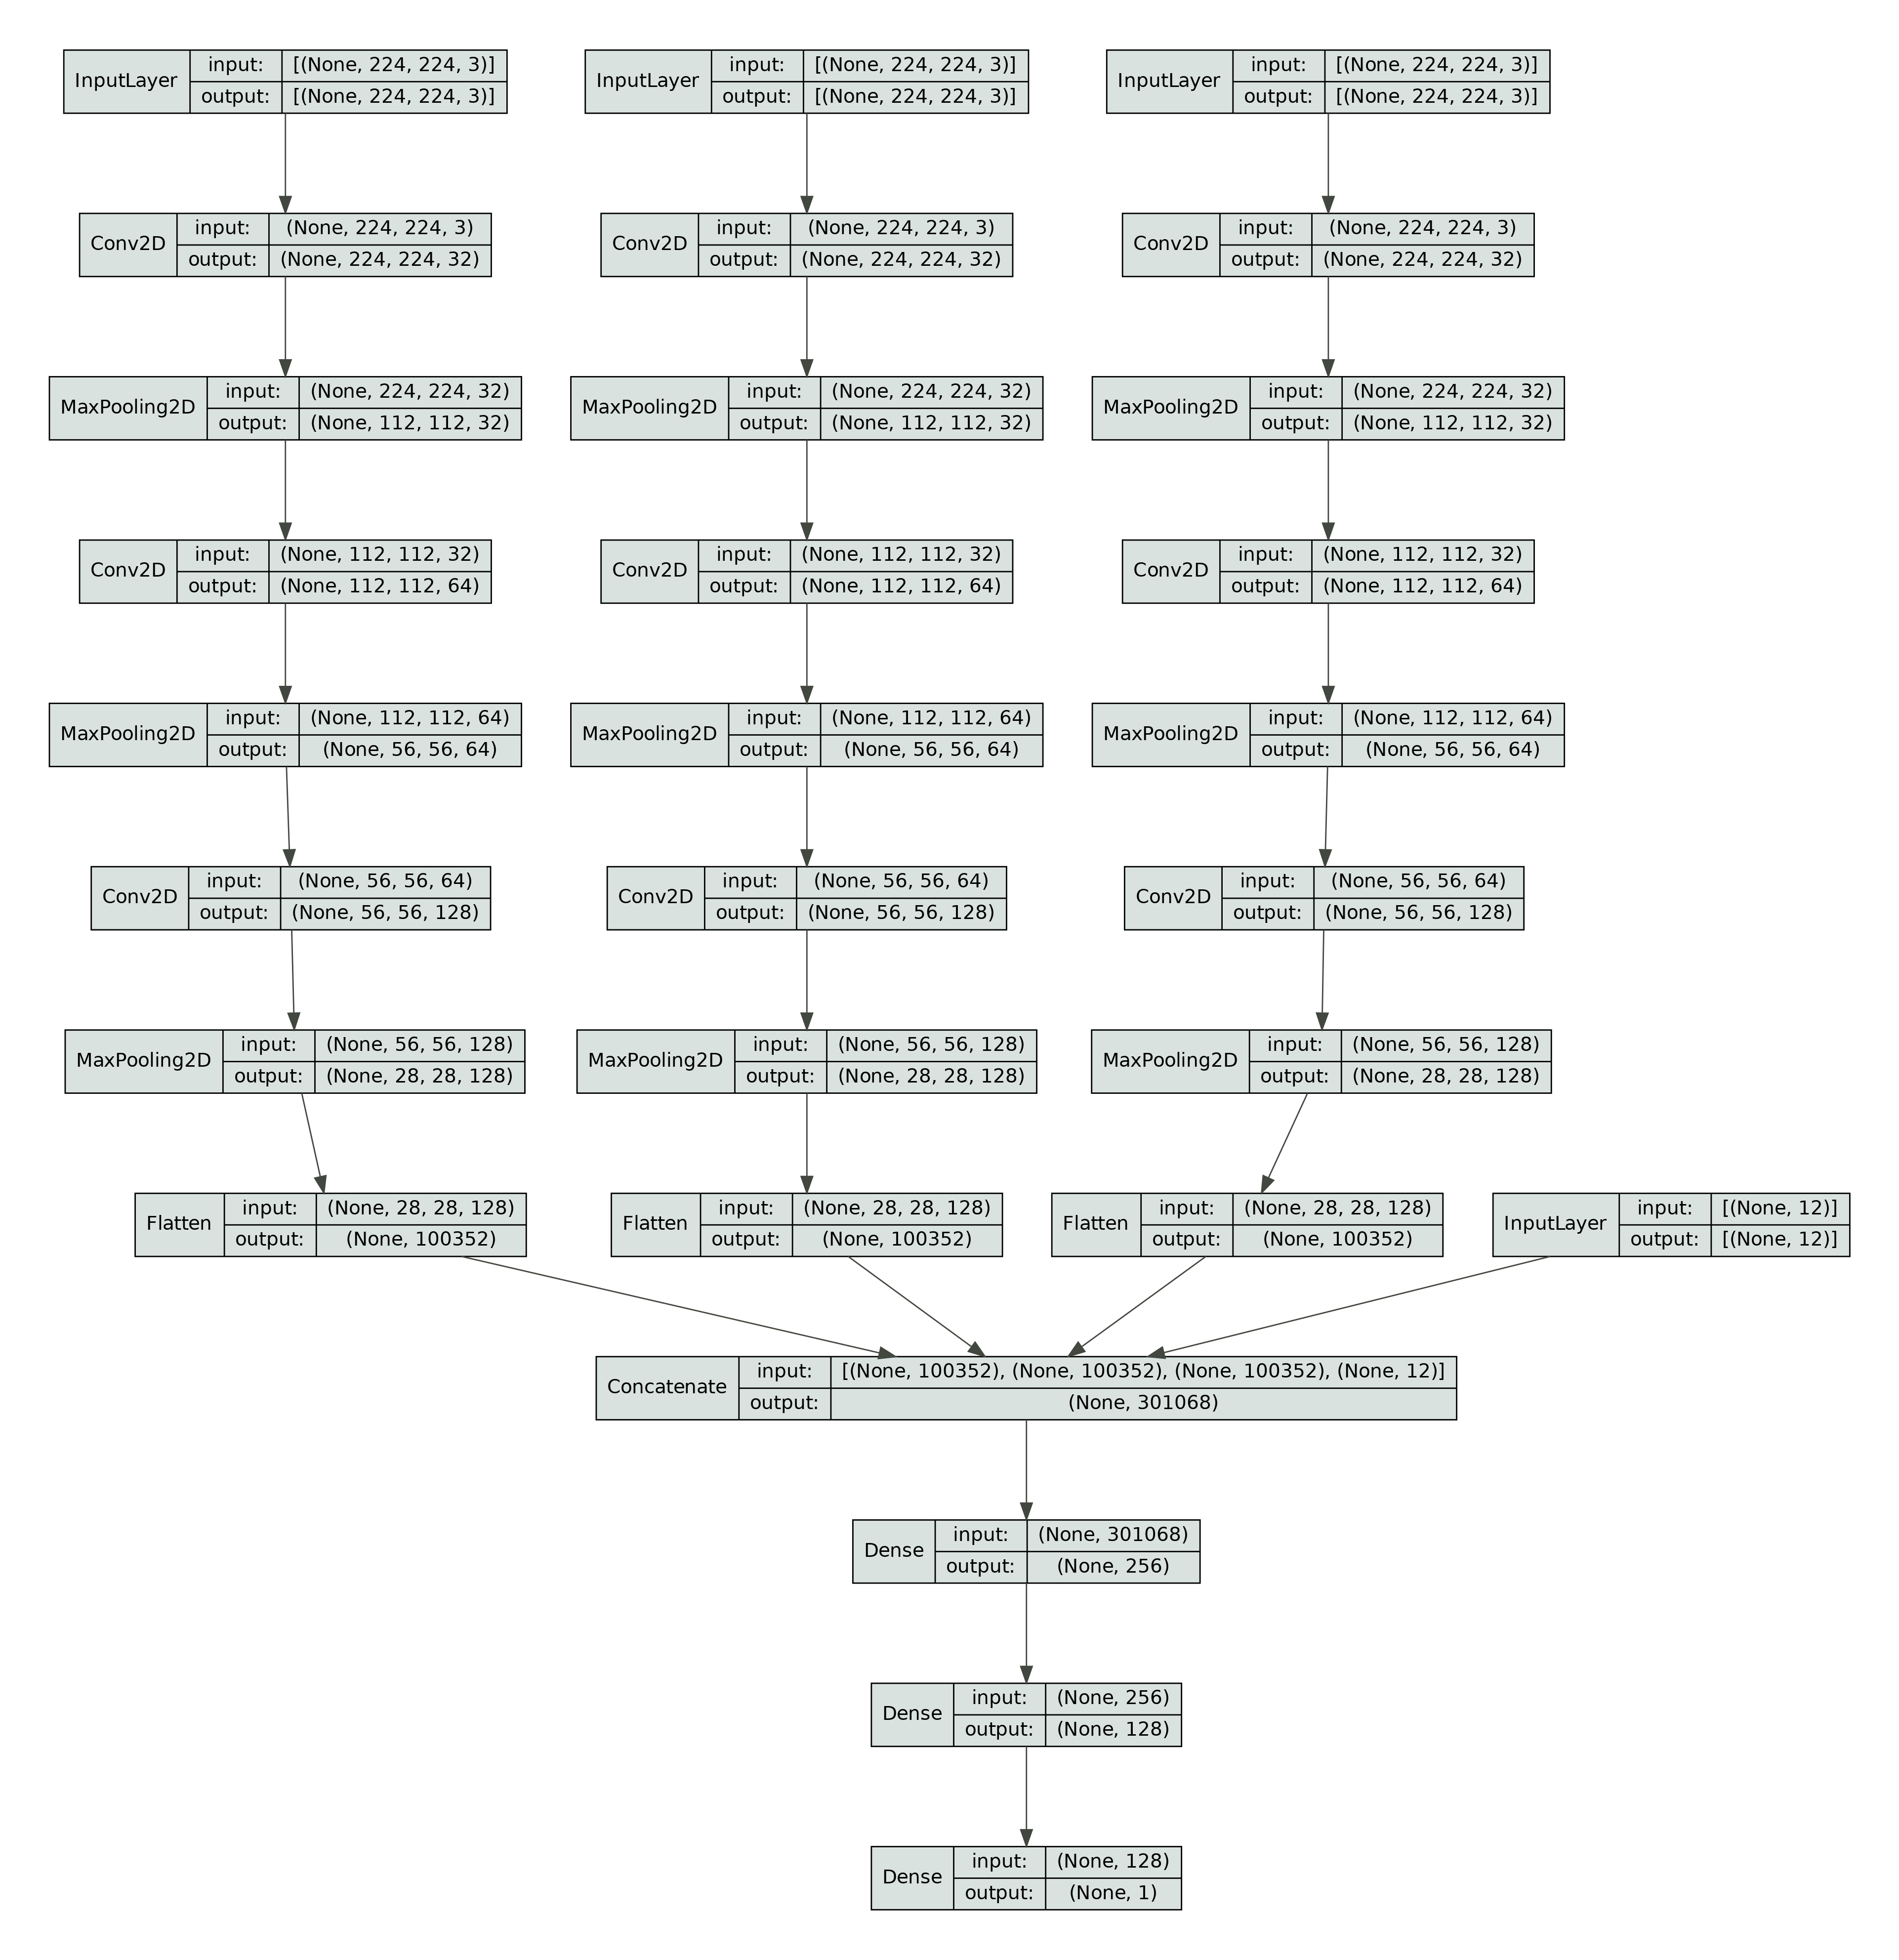

In [3]:
from keras.utils import model_to_dot
from IPython.display import Image

dot = model_to_dot(
    model,
    show_shapes=True,
    show_layer_names=False,
    rankdir='TB',
    dpi=200
)

for n in dot.get_nodes():

    n.set('style', 'filled')
    n.set('fillcolor', '#D9E2DF')
    n.set('fontname', 'Helvetica')

for e in dot.get_edges():

    e.set('color', '#42473F')
    e.set('arrowsize', '1.2')

dot.set_graph_defaults(
    bgcolor='#FFFFFF',
    pad='0.5',
    ranksep='1.0',
    nodesep='0.5'
)
dot.set_node_defaults(
    shape='box',
    style='filled',
    fillcolor='#D9E2DF',
    height='0.5',
    width='0.5',
    fontsize='10',
    color='#666666'
)
dot.set_edge_defaults(
    color='#D9E2DF',
    arrowsize='0.8',
    fontsize='10'
)

dot.write_png('MOSTLY_Data_3/architectures/model_3_Architecture.png')
Image('MOSTLY_Data_3/architectures/model_3_Architecture.png')